In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
data = datasets.load_digits()

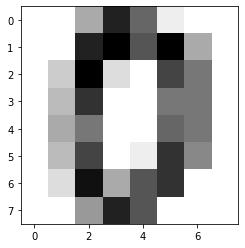

In [3]:
plt.subplot()
plt.imshow(data.images[0], cmap=plt.cm.gray_r)

In [4]:
X = data.images.reshape((len(data.images), -1))

In [5]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
y = data.target

In [7]:
import sklearn
sklearn.__version__

'0.22.1'

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rfc_clf = RandomForestClassifier(n_estimators=1000, bootstrap=True, oob_score=True)
rfc_clf.fit(X[:1000], y[:1000])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
from sklearn import metrics

In [11]:
p = rfc_clf.predict(X[1000:])
e = y[1000:]
print(metrics.classification_report(e, p))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.95      0.89      0.92        80
           2       0.99      0.92      0.95        77
           3       0.93      0.84      0.88        79
           4       0.98      0.95      0.96        83
           5       0.89      0.98      0.93        82
           6       0.99      0.99      0.99        80
           7       0.93      0.97      0.95        80
           8       0.87      0.88      0.88        76
           9       0.85      0.93      0.89        81

    accuracy                           0.93       797
   macro avg       0.94      0.93      0.93       797
weighted avg       0.94      0.93      0.93       797



In [12]:
print(metrics.confusion_matrix(e, p))

[[78  0  0  0  1  0  0  0  0  0]
 [ 0 71  0  2  0  1  0  0  0  6]
 [ 1  1 71  1  0  0  0  0  0  3]
 [ 0  0  0 66  0  3  0  3  7  0]
 [ 0  0  0  0 79  0  0  2  0  2]
 [ 0  0  0  0  0 80  1  0  0  1]
 [ 0  1  0  0  0  0 79  0  0  0]
 [ 0  0  0  0  0  0  0 78  2  0]
 [ 0  2  1  0  1  3  0  1 67  1]
 [ 0  0  0  2  0  3  0  0  1 75]]


In [22]:
len(e)

797

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [28]:
ada_clf = AdaBoostClassifier(base_estimator=SVC(probability=True, kernel='rbf'), n_estimators=100)
ada_clf.fit(X[:1000], y[:1000])

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma='scale', kernel='rbf', max_iter=-1,
                                      probability=True, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=1.0, n_estimators=100, random_state=None)

In [29]:
p = ada_clf.predict(X[1000:])
e = y[1000:]
print(metrics.classification_report(e, p))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        79
           1       0.95      0.97      0.96        80
           2       0.96      0.91      0.93        77
           3       0.71      0.89      0.79        79
           4       0.96      0.96      0.96        83
           5       0.92      0.94      0.93        82
           6       0.95      0.99      0.97        80
           7       0.90      0.96      0.93        80
           8       0.94      0.82      0.87        76
           9       0.95      0.78      0.86        81

    accuracy                           0.92       797
   macro avg       0.92      0.92      0.92       797
weighted avg       0.92      0.92      0.92       797



In [ ]:
# MasoudKaviani.ir